<a href="https://colab.research.google.com/github/M-qasimm/Elevvo-Projects/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
print(data.head())


/tmp/ipython-input-3244925509.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538506  72.598884  71.292296  71.545882  135480400
2020-01-03  71.833275  72.594040  71.608669  71.765651  146322800
2020-01-06  72.405670  72.444313  70.703005  70.954181  118387200
2020-01-07  72.065140  72.671333  71.845362  72.415330  108872000
2020-01-08  73.224396  73.526287  71.768071  71.768071  132079200


In [3]:
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)


In [5]:
sequence_length = 60  # last 60 days → predict next day
x_train, y_train = [], []

for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0897
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0040
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0021
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0016
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0015


In [8]:
# 8. Prepare test data
test_data = scaled_data[-(sequence_length+30):]  # last 60+30 days
x_test, y_test = [], close_prices[-30:]

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [9]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


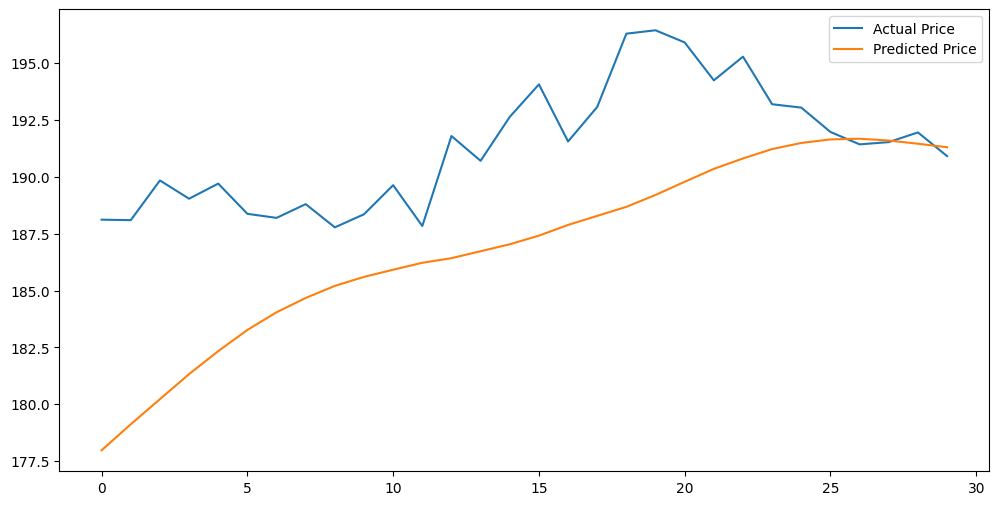

In [10]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.show()